# 数据预处理

In [15]:
import pandas as pd
df = pd.read_excel('因子库_09.xlsx')
df

,date,国债1yYTM,国债3yYTM,国债5yYTM,国债7yYTM,国债10yYTM,国债30yYTM,国开1yYTM,国开3yYTM,国开5yYTM,...,二级1yYTM_20dMA,二级2yYTM_20dMA,二级3yYTM_20dMA,二级4yYTM_20dMA,二级5yYTM_20dMA,永续1yYTM_20dMA,永续2yYTM_20dMA,永续3yYTM_20dMA,永续4yYTM_20dMA,永续5yYTM_20dMA
0,2019-01-02,2.5014,2.7859,2.9466,3.0876,3.1734,3.6756,2.6536,3.1877,3.4592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,2.5017,2.7776,2.8965,3.1031,3.1410,3.6806,2.5400,3.1643,3.4343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,2.4525,2.7922,2.8850,3.1040,3.1513,3.7007,2.4902,3.1875,3.4587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,2.4026,2.7917,2.9303,3.1272,3.1507,3.7007,2.4902,3.1351,3.4502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-08,2.3528,2.7530,2.8796,3.0836,3.1211,3.6757,2.4806,3.0503,3.3885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,2025-07-21,1.3565,1.4202,1.5421,1.6375,1.6774,1.9115,1.4851,1.6125,1.6221,...,1.691060,1.759210,1.803365,1.862270,1.887610,1.696270,1.781000,1.846150,1.907225,1.941910
1635,2025-07-22,1.3590,1.4229,1.5559,1.6530,1.6907,1.9335,1.4886,1.6225,1.6322,...,1.688130,1.757490,1.803550,1.863420,1.888005,1.693550,1.779640,1.846240,1.909005,1.942620
1636,2025-07-23,1.3741,1.4467,1.5749,1.6685,1.7041,1.9380,1.4943,1.6400,1.6545,...,1.685465,1.756780,1.804355,1.865915,1.889540,1.692055,1.779810,1.847085,1.911655,1.944785
1637,2025-07-24,1.3941,1.4744,1.5939,1.6933,1.7376,1.9790,1.5319,1.6800,1.7068,...,1.684960,1.758535,1.808220,1.871300,1.893720,1.692135,1.781925,1.850740,1.916605,1.949515


In [16]:
# 空值统计
null_counts = df.isnull().sum()

# 保存为文本文件
with open('null_counts.txt', 'w', encoding='utf-8') as f:
    f.write(null_counts.to_string())


## 处理差分

In [17]:
# 计算差分
df['value'] = (df['二级5yYTM'].diff())
df['value_sort'] = (df['二级5yYTM'].diff() > 0).astype(int)

# 删除第一行
df = df.dropna(subset=['value']).reset_index(drop=True)

In [18]:
df.to_excel('factor_09.xlsx', index=False)

# 直接特征筛选

In [66]:
import pandas as pd
# 读取因子数据并清理非空列
df = pd.read_excel('factor_09.xlsx')
non_na_columns = df.columns[df.notna().all()]
df_clean = df[non_na_columns]
print(df_clean.head())

        date  国债1yYTM  国债3yYTM  国债5yYTM  国债7yYTM  国债10yYTM  国债30yYTM  国开1yYTM  \
0 2019-01-03   2.5017   2.7776   2.8965   3.1031    3.1410    3.6806   2.5400   
1 2019-01-04   2.4525   2.7922   2.8850   3.1040    3.1513    3.7007   2.4902   
2 2019-01-07   2.4026   2.7917   2.9303   3.1272    3.1507    3.7007   2.4902   
3 2019-01-08   2.3528   2.7530   2.8796   3.0836    3.1211    3.6757   2.4806   
4 2019-01-09   2.3777   2.7604   2.8745   3.1010    3.1106    3.7007   2.4945   

   国开3yYTM  国开5yYTM  ...  国开10y-1y  二级5y-3y  二级5y-1y  二级3y-1y  国开10y-国债10y  \
0   3.1643   3.4343  ...    0.9400   0.2165   0.6627   0.4462       0.3390   
1   3.1875   3.4587  ...    0.9928   0.2413   0.6244   0.3831       0.3317   
2   3.1351   3.4502  ...    0.9801   0.2116   0.6454   0.4338       0.3196   
3   3.0503   3.3885  ...    0.9897   0.2016   0.6854   0.4838       0.3492   
4   3.0629   3.3930  ...    0.9920   0.2346   0.6888   0.4542       0.3759   

   国开5y-国债5y  国开1y-国债1y  国债10y-NCD1y   value

In [ ]:
df_clean['date'] = df_clean['date'].astype('int64')

In [30]:
col_names = ['date','二级5yYTM','value']
df_clean =df[col_names]
df_clean

,date,二级5yYTM,value
0,2019-01-03,4.3184,-0.0350
1,2019-01-04,4.2990,-0.0194
2,2019-01-07,4.2454,-0.0536
3,2019-01-08,4.2854,0.0400
4,2019-01-09,4.2854,0.0000
...,...,...,...
1633,2025-07-21,1.9004,0.0202
1634,2025-07-22,1.9261,0.0257
1635,2025-07-23,1.9614,0.0353
1636,2025-07-24,2.0126,0.0512


# 提取现有的

In [114]:
best_cols = [
    'Repo5Y',
    '国开5yYTM',
    '国债30yYTM',
    '国债7yYTM',
    'Repo1Y',
    '国开3yYTM',
    '国债3yYTM',
    '国开7yYTM',
    '国债10yYTM',
    '国开10yYTM',
    '国开30yYTM',
    '二级4yYTM',
    'NCD3mYTM_5dMA',
    'TF当季价格',
    'TS当季价格',
    'shibor5-shibor1',
    'Shibor5Y',
    'DR007',
    'NCD6mYTM',
    'Shibor1Y',
    '二级2yYTM',
    '国债5yYTM',
    'TS成交量',
    'R014',
    'NCD3mYTM',
    'DR014_5dMA',
    '二级5y-3y'
]


In [ ]:
import pandas as pd
# 读取因子数据并清理非空列
df = pd.read_excel('factor_09.xlsx')
df_clean = df[best_cols + ['date','value']].dropna()


In [94]:
# 空值统计
null_counts = df_clean.isnull().sum()

# 保存为文本文件
with open('null_counts_best_cols.txt', 'w', encoding='utf-8') as f:
    f.write(null_counts.to_string())

In [116]:
non_na_columns = df_clean.columns[df_clean.notna().all()]
df_clean = df_clean[non_na_columns]

In [109]:
df_clean = df_clean.dropna(subset=['date']).reset_index(drop=True)

In [117]:
print(df_clean.columns)

Index(['Repo5Y', '国开5yYTM', '国债30yYTM', '国债7yYTM', 'Repo1Y', '国开3yYTM',
       '国债3yYTM', '国开7yYTM', '国债10yYTM', '国开10yYTM', '国开30yYTM', '二级4yYTM',
       'NCD3mYTM_5dMA', 'TF当季价格', 'TS当季价格', 'shibor5-shibor1', 'Shibor5Y',
       'DR007', 'NCD6mYTM', 'Shibor1Y', '二级2yYTM', '国债5yYTM', 'TS成交量', 'R014',
       'NCD3mYTM', 'DR014_5dMA', '二级5y-3y', 'date', 'value'],
      dtype='object')


# 按照故代码

In [2]:
import numpy as np
import pandas as pd

df_raw = pd.read_excel('因子库_09.xlsx')
df_raw.set_index('date', inplace=True)
#df_raw = df_raw.loc[df_raw.index > '2021-08-13']#永续回测需要
df = pd.DataFrame(index=df_raw.index)
df = pd.concat([df, df_raw.iloc[:, 0:63].diff(1)], axis=1)
df = pd.concat([df, df_raw.iloc[:, 63:65].fillna(method='ffill').diff(1)], axis=1)
df = pd.concat([df, df_raw.iloc[:, 65:]], axis=1)

df = df.dropna(thresh=df.shape[1] / 2)  # 删除一行超过20各na的数据，主要涉及周末
for col in df.columns:  # 删除na过多的列，主要涉及永续收益率
    if df[col].isnull().sum() > df.shape[0] / 2:
        print(col, '前端缺失，已删除。')
        df.drop([col], axis=1, inplace=True)
# 将各列由object转换为数值,将异常值替换为缺失值，然后对缺失值进行线性插补
for col in df.columns:
    df[col] = pd.to_numeric(df[col])
    # z-score绝对值大于5判定为异常值
    df[col] = df[col].apply(lambda x: np.nan if abs(
        (x - df[col].mean()) / df[col].std()) > 5 else x)
    df[col] = df[col].interpolate(method='linear', axis=0)  # 线性插补
# data = data.set_index('日期')
df.fillna(0, inplace=True)
df_clean = df.dropna()
print(df_clean.info())

df_clean['value_sort'] = df_clean['二级5yYTM'].shift(-1).apply(lambda x: 1 if x > 0 else 0)
df_clean = df_clean.iloc[:-1]

C:\Users\86198\AppData\Local\Temp\ipykernel_16724\748028958.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = pd.concat([df, df_raw.iloc[:, 63:65].fillna(method='ffill').diff(1)], axis=1)


TL当季价格 前端缺失，已删除。
TL下季价格 前端缺失，已删除。
TL成交量 前端缺失，已删除。
TL持仓量 前端缺失，已删除。
TL跨期价差 前端缺失，已删除。
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1635 entries, 2019-01-08 to 2025-07-25
Columns: 148 entries, 国债1yYTM to 永续5yYTM_20dMA
dtypes: float64(148)
memory usage: 1.9 MB
None


In [6]:
import re
import pandas as pd

# === 你已经按之前流程得到的 df_clean ===
# 假设此时 df_clean 已存在，且包含清洗/差分/插补后的因子列

# 从图中读到的前五个因子关键词（尽量兼容不同命名）
top5_keys = [
    r'二级5yYTM',
    r"^Repo5Y$",          # Repo5Y
    r"国开.*5.*Y.*TM",    # 国开5Y YTM（容忍大小写/插入字符）
    r"国债.*30.*Y.*TM",   # 国债30YTM
    r"国债.*7.*Y.*TM",    # 国债7YTM
    r"^Repo1Y$",          # Repo1Y
    r"永续5yYTM"
]

# 在 df_clean.columns 中做模糊匹配，找到实际列名
def match_first(pattern, columns):
    regex = re.compile(pattern, re.IGNORECASE)
    for c in columns:
        if regex.search(c):
            return c
    return None

matched_cols = []
for pat in top5_keys:
    col = match_first(pat, df_clean.columns)
    if col is None:
        print(f"[WARN] 没匹配到列：{pat} ；请检查列名或修改匹配规则。")
    matched_cols.append(col)

# 过滤掉没匹配到的项
matched_cols = [c for c in matched_cols if c is not None]

# 计算统计量：均值、方差（ddof=1）、中位数、标准差（ddof=1）
stats = {}
for c in matched_cols:
    s = pd.to_numeric(df_clean[c], errors='coerce').dropna()
    stats[c] = {
        "mean":   s.mean(),
        "var":    s.var(ddof=1),
        "median": s.median(),
        "std":    s.std(ddof=1),
    }

# 打印成 DataFrame（按图中顺序显示）
out = pd.DataFrame(stats).T[["mean", "var", "median", "std"]].round(6)
print(out)

              mean       var   median       std
二级5yYTM  -0.001496  0.000615 -0.00200  0.024802
Repo5Y   -0.000858  0.000717 -0.00120  0.026785
国开5yYTM  -0.001241  0.000681 -0.00085  0.026087
国债30yYTM -0.000885  0.000385 -0.00020  0.019633
国债7yYTM  -0.000862  0.000480 -0.00015  0.021907
Repo1Y   -0.000759  0.000557 -0.00055  0.023611
永续5yYTM  -0.001055  0.000519  0.00000  0.022790


# 特征工程

## 降维

### 过滤法

In [21]:
import pandas as pd
# 读取因子数据并清理非空行
df = pd.read_excel('factor_09.xlsx')
df = df[df.isna().any(axis=1)]

In [22]:
df.shape

(1302, 156)

# XGBoost+Transformer

**该代码的几个问题**
- `torch.utils.data.random_split`使得过去、未来序列被错误划分，模型可能通过训练未来序列来预测过去序列
- 缺乏位置编码
- 单变量

## 原版改

In [ ]:
# ========== 依赖 ==========
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import xgboost as xgb
import random

# ========== 全局超参 ==========
WINDOW_SIZE   = 24    # 滑动窗口长度
BATCH_SIZE    = 32
EPOCHS        = 60
LR            = 1e-3
SEED          = 42

# ========== 随机种子 ==========
def seed_everything(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
seed_everything()

# ========== 1. 按时间顺序切分 ==========
series = df_clean['value'].astype(float).to_numpy()
split_idx = int(len(series) * 0.8)              # 80% 训练，20% 测试
train_raw, test_raw = series[:split_idx], series[split_idx:]

# ========== 2. 标准化（只用训练集拟合） ==========
scaler = StandardScaler()
train_raw = scaler.fit_transform(train_raw.reshape(-1, 1)).flatten()
test_raw  = scaler.transform(test_raw.reshape(-1, 1)).flatten()

# ========== 3. Dataset & Dataloader ==========
class TimeSeriesDataset(Dataset):
    def __init__(self, seq, window_size):
        X, y = [], []
        for i in range(len(seq) - window_size):
            X.append(seq[i:i+window_size])
            y.append(seq[i+window_size])
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):  return len(X)
    def __getitem__(self, idx):  return X[idx], y[idx]

train_ds = TimeSeriesDataset(train_raw, WINDOW_SIZE)
test_ds  = TimeSeriesDataset(test_raw,  WINDOW_SIZE)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False)

# ========== 4. Transformer 表征模型 ==========
class TransformerModel(nn.Module):
    def __init__(self, input_size=1, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        input_linear = nn.Linear(input_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model,
                                                   nhead=nhead,
                                                   batch_first=True)
        encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        output_layer = nn.Linear(d_model, 1)

    def forward(self, x):                # x shape: (B, L, 1)
        x = input_linear(x)         # (B, L, d_model)
        h = encoder(x)              # (B, L, d_model)
        out = output_layer(h[:, -1])# 取最后时间步
        return out.squeeze()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model  = TransformerModel().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ---------- 训练 ----------
for epoch in range(EPOCHS):
    model.train(); running_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.unsqueeze(-1).to(device)  # (B, L, 1)
        y_batch = y_batch.to(device)
        optimizer.zero_grad()
        loss = criterion(model(X_batch), y_batch)
        loss.backward(); optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1:02d} | Train MSE: {running_loss/len(train_loader):.4f}")

# ========== 5. 特征提取（train / test 各自提） ==========
@torch.no_grad()
def extract_features(model, seq, window_size):
    model.eval()
    feats, tars = [], []
    for i in range(window_size, len(seq)):
        x_seq = torch.tensor(seq[i-window_size:i], dtype=torch.float32)\
                 .unsqueeze(0).unsqueeze(-1).to(device)   # (1, L, 1)
        h = model.input_linear(x_seq)                     # (1, L, d_model)
        h = model.encoder(h)                              # ...
        feats.append(h[:, -1].squeeze().cpu().numpy())    # (d_model,)
        tars.append(seq[i])
    return np.array(feats), np.array(tars)

X_train, y_train = extract_features(model, train_raw, WINDOW_SIZE)
X_test,  y_test  = extract_features(model, test_raw,  WINDOW_SIZE)

# ========== 6. XGBoost 训练 ==========
xgb_model = xgb.XGBRegressor(
    n_estimators=300, max_depth=5, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8, random_state=SEED
)
xgb_model.fit(X_train, y_train)

# ---------- 评估 ----------
y_pred = xgb_model.predict(X_test)
print("\n---- Evaluation on Test ----")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Epoch 01 | Train MSE: 1.0738
Epoch 02 | Train MSE: 0.9873
Epoch 03 | Train MSE: 0.9374
Epoch 04 | Train MSE: 0.9582
Epoch 05 | Train MSE: 0.9608
Epoch 06 | Train MSE: 0.9255
Epoch 07 | Train MSE: 0.9831
Epoch 08 | Train MSE: 0.9525
Epoch 09 | Train MSE: 0.9206
Epoch 10 | Train MSE: 0.9241
Epoch 11 | Train MSE: 0.9738
Epoch 12 | Train MSE: 0.9272
Epoch 13 | Train MSE: 0.9380
Epoch 14 | Train MSE: 0.9284
Epoch 15 | Train MSE: 0.9294
Epoch 16 | Train MSE: 0.9184
Epoch 17 | Train MSE: 0.9853
Epoch 18 | Train MSE: 0.9364
Epoch 19 | Train MSE: 0.9266
Epoch 20 | Train MSE: 0.9605
Epoch 21 | Train MSE: 0.9168
Epoch 22 | Train MSE: 0.9020
Epoch 23 | Train MSE: 0.8987
Epoch 24 | Train MSE: 0.9137
Epoch 25 | Train MSE: 0.9098
Epoch 26 | Train MSE: 0.9155
Epoch 27 | Train MSE: 0.9300
Epoch 28 | Train MSE: 0.9077
Epoch 29 | Train MSE: 0.9108
Epoch 30 | Train MSE: 0.9189
Epoch 31 | Train MSE: 0.9291
Epoch 32 | Train MSE: 0.9277
Epoch 33 | Train MSE: 0.9027
Epoch 34 | Train MSE: 0.9186
Epoch 35 | Tra

MSE: 1.439760420707747
MAE: 0.8363271690631846


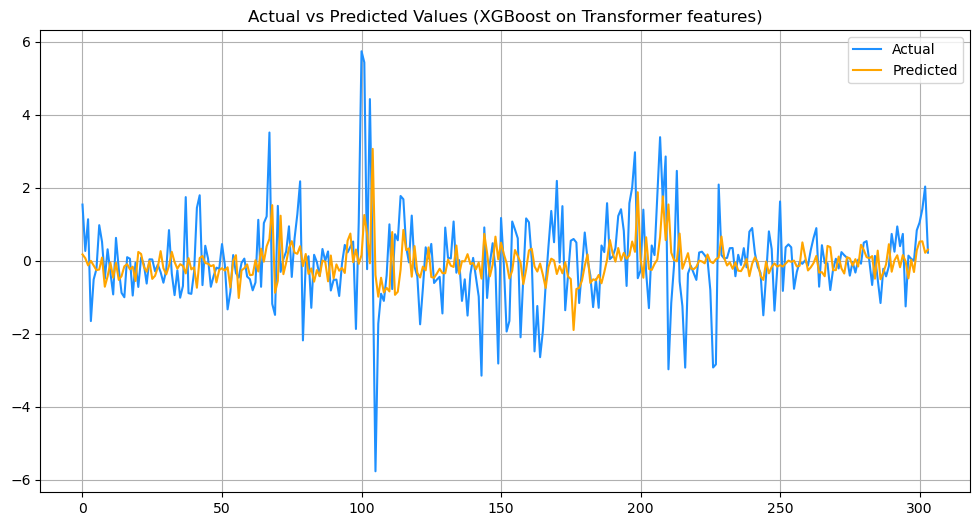

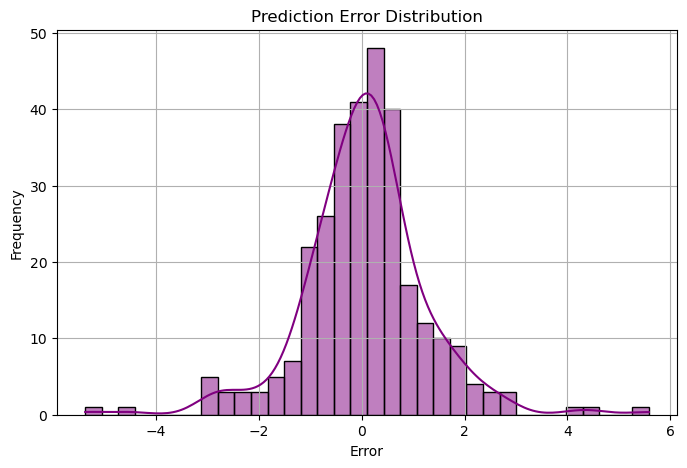

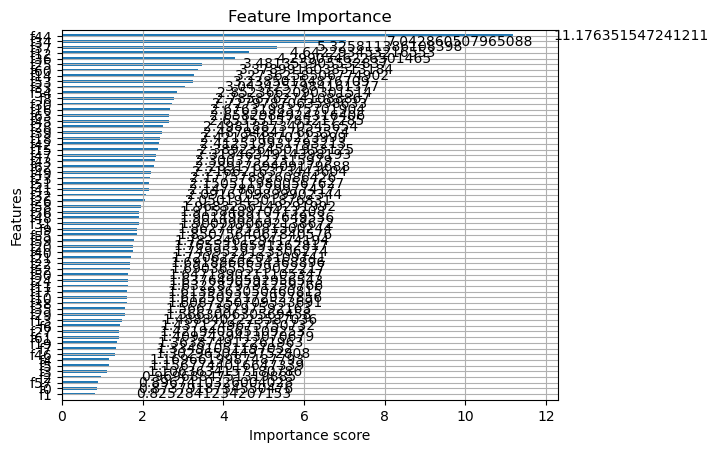

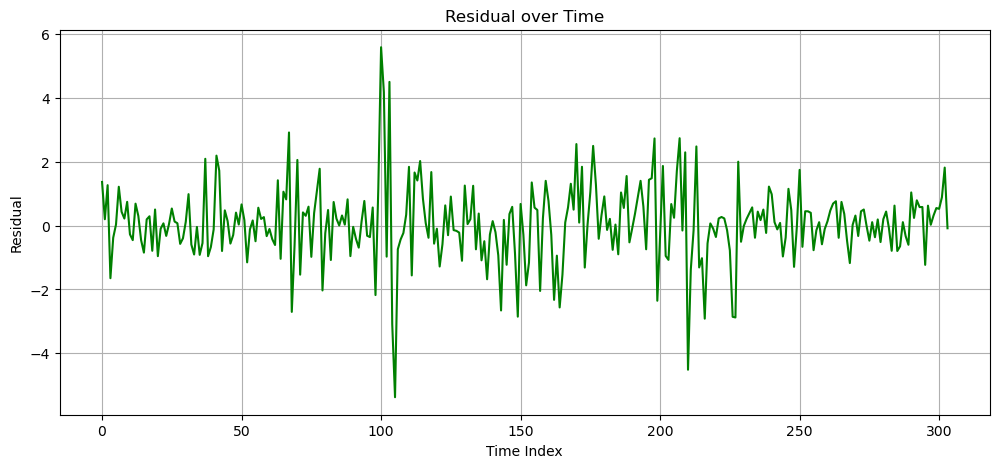

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_predictions(y_true, y_pred):
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual', color='dodgerblue')
    plt.plot(y_pred, label='Predicted', color='orange')
    plt.title("Actual vs Predicted Values (XGBoost on Transformer features)")
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_predictions(y_test, y_pred)

# 图表2：误差分布
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred, kde=True, color="purple")
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 图表3：特征重要性
xgb.plot_importance(xgb_model, height=0.5, importance_type='gain', title="Feature Importance")
plt.show()

# 图表4：预测残差随时间分布
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(y_test)), y_test - y_pred, color="green")
plt.title("Residual over Time")
plt.xlabel("Time Index")
plt.ylabel("Residual")
plt.grid(True)
plt.show()

## 修正版本-非单变量输入

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import xgboost as xgb
import random
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 全局超参 ==========
WINDOW_SIZE   = 12    # 滑动窗口长度
BATCH_SIZE    = 32
EPOCHS        = 30
LR            = 1e-3
SEED          = 42

# ========== 设置随机种子 ==========
def seed_everything(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
seed_everything()

# ========== 特征和标签分离 ==========
# 为了模拟多变量输入，添加滞后特征
# 这里假设 'value' 是目标变量，其他列是特征
for lag in range(1, WINDOW_SIZE+1):
    df_clean[f'value_lag_{lag}'] = df_clean['value'].shift(lag)
df_clean = df_clean.dropna().reset_index(drop=True)

# 假设除了'value'，其他数值型特征都要加上
value_lag_cols = [f'value_lag_{lag}' for lag in range(1, WINDOW_SIZE+1)]
other_feature_cols = [col for col in df_clean.columns if col not in ['value'] + value_lag_cols]
feature_cols = other_feature_cols + value_lag_cols   # 顺序可调整，常把滞后放后面
target_col = 'value'  # 目标变量

df_clean['date'] = df_clean['date'].astype('int64')


# 只要数值型特征
features = df_clean[feature_cols].astype(float).to_numpy()  # shape: (N, D)
target   = df_clean[target_col].astype(float).to_numpy()    # shape: (N,)

# ========== 按时间顺序切分 ==========
split_idx = int(len(features) * 0.8)
train_x, test_x = features[:split_idx], features[split_idx:]
train_y, test_y = target[:split_idx],   target[split_idx:]

# ========== 只用训练集拟合标准化器 ==========
scaler_x = StandardScaler()
scaler_y = StandardScaler()
train_x = scaler_x.fit_transform(train_x)
test_x  = scaler_x.transform(test_x)
train_y = scaler_y.fit_transform(train_y.reshape(-1, 1)).flatten()
test_y  = scaler_y.transform(test_y.reshape(-1, 1)).flatten()

# ========== Dataset & Dataloader ==========
class TimeSeriesDataset(Dataset):
    def __init__(self, X_arr, y_arr, window_size):
        X, y = [], []
        for i in range(len(X_arr) - window_size):
            X.append(X_arr[i:i+window_size, :])
            y.append(y_arr[i+window_size])
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):  return len(self.X)
    def __getitem__(self, idx):  return self.X[idx], self.y[idx]

# ========== 位置编码 ==========
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# ========== 4. Transformer 表征模型 ==========
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=64, nhead=4, num_layers=2, max_len=500):
        super().__init__()
        self.input_linear = nn.Linear(input_size, d_model)
        self.pos_encoder  = PositionalEncoding(d_model, max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.output_layer = nn.Linear(d_model, 1)
    def forward(self, x):      # (B, L, D)
        x = self.input_linear(x)
        x = self.pos_encoder(x)
        h = self.encoder(x)
        out = self.output_layer(h[:, -1])
        return out.squeeze()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
D = train_ds[0][0].shape[1]
model = TransformerModel(input_size=D).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)


for epoch in range(EPOCHS):
    model.train()
    running_loss = 0
    total_preds, total_labels = [], []
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        preds = model(X_batch)
        loss = criterion(preds, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        total_preds.extend(preds.detach().cpu().numpy())
        total_labels.extend(y_batch.cpu().numpy())
    mae = mean_absolute_error(total_labels, total_preds)
    print(f"Epoch {epoch+1:02d} | Train MSE: {running_loss/len(train_loader):.4f} | MAE: {mae:.4f}")

# ========== 测试评估 ==========
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        preds = model(X_batch)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())
mse = mean_squared_error(all_labels, all_preds)
mae = mean_absolute_error(all_labels, all_preds)
print(f"Test MSE: {mse:.4f} | Test MAE: {mae:.4f}")

# ========== 特征提取 ==========
@torch.no_grad()
def extract_features(model, X, y, window_size):
    """
    X: ndarray, shape (N, D)  多变量输入
    y: ndarray, shape (N,)     目标
    """
    model.eval()
    feats, tars = [], []
    for i in range(window_size, len(X)):
        x_seq = torch.tensor(X[i-window_size:i], dtype=torch.float32)  # (L, D)
        x_seq = x_seq.unsqueeze(0).to(model.input_linear.weight.device)  # (1, L, D)
        h = model.input_linear(x_seq)            # (1, L, d_model)
        h = model.pos_encoder(h)                 # (1, L, d_model)
        h = model.encoder(h)                     # (1, L, d_model)
        feats.append(h[:, -1].squeeze().cpu().numpy())  # (d_model,)
        tars.append(y[i])  # 标准化后的目标
    return np.array(feats), np.array(tars)

# 提取特征（注意传入X和y）
X_train_feats, y_train_feats = extract_features(model, train_x, train_y, WINDOW_SIZE)
X_test_feats,  y_test_feats  = extract_features(model, test_x,  test_y,  WINDOW_SIZE)

# ========== 6. XGBoost 训练 ==========
xgb_model = xgb.XGBRegressor(
    n_estimators=300, max_depth=5, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8, random_state=SEED
)
xgb_model.fit(X_train_feats, y_train_feats)

# ========== XGBoost 测试 ==========
y_pred_xgb = xgb_model.predict(X_test_feats)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("XGBoost on Transformer features (Standardized):")
print("MAE:", mean_absolute_error(y_test_feats, y_pred_xgb))
print("MSE:", mean_squared_error(y_test_feats, y_pred_xgb))

Epoch 01 | Train MSE: 1.2881 | MAE: 0.7905
Epoch 02 | Train MSE: 0.9695 | MAE: 0.6816
Epoch 03 | Train MSE: 0.9907 | MAE: 0.6854
Epoch 04 | Train MSE: 0.9105 | MAE: 0.6621
Epoch 05 | Train MSE: 0.8993 | MAE: 0.6745
Epoch 06 | Train MSE: 0.8182 | MAE: 0.6357
Epoch 07 | Train MSE: 0.7400 | MAE: 0.6272
Epoch 08 | Train MSE: 0.6820 | MAE: 0.6025
Epoch 09 | Train MSE: 0.7038 | MAE: 0.6086
Epoch 10 | Train MSE: 0.5915 | MAE: 0.5725
Epoch 11 | Train MSE: 0.5810 | MAE: 0.5571
Epoch 12 | Train MSE: 0.4796 | MAE: 0.5106
Epoch 13 | Train MSE: 0.4086 | MAE: 0.4839
Epoch 14 | Train MSE: 0.3807 | MAE: 0.4657
Epoch 15 | Train MSE: 0.3757 | MAE: 0.4598
Epoch 16 | Train MSE: 0.3048 | MAE: 0.4150
Epoch 17 | Train MSE: 0.2415 | MAE: 0.3728
Epoch 18 | Train MSE: 0.2338 | MAE: 0.3596
Epoch 19 | Train MSE: 0.2785 | MAE: 0.3902
Epoch 20 | Train MSE: 0.2247 | MAE: 0.3565
Epoch 21 | Train MSE: 0.1766 | MAE: 0.3206
Epoch 22 | Train MSE: 0.1991 | MAE: 0.3307
Epoch 23 | Train MSE: 0.2396 | MAE: 0.3643
Epoch 24 | 

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import xgboost as xgb
import random
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 全局超参 ==========
WINDOW_SIZE   = 12    # 滑动窗口长度
BATCH_SIZE    = 32
EPOCHS        = 15
LR            = 1e-3
SEED          = 42

# ========== 设置随机种子 ==========
def seed_everything(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
seed_everything()

# ========== 特征和标签分离 ==========
# 为了模拟多变量输入，添加滞后特征
for lag in range(1, WINDOW_SIZE+1):
    df_clean[f'value_lag_{lag}'] = df_clean['value_sort'].shift(lag)
df_clean = df_clean.dropna().reset_index(drop=True)

# 假设除了'value'，其他数值型特征都要加上
value_lag_cols = [f'value_lag_{lag}' for lag in range(1, WINDOW_SIZE+1)]
other_feature_cols = [col for col in df_clean.columns if col not in ['value_sort'] + value_lag_cols]
feature_cols = other_feature_cols + value_lag_cols   # 顺序可调整

target_col = 'value_sort'  # 新标签，二分类，0/1

# df_clean['date'] = df_clean['date'].astype('int64')

# 只要数值型特征
features = df_clean[feature_cols].astype(float).to_numpy()  # shape: (N, D)
target   = df_clean[target_col].astype(int).to_numpy()      # shape: (N,)

# ========== 按时间顺序切分 ==========
split_idx = int(len(features) * 0.8)
train_x, test_x = features[:split_idx], features[split_idx:]
train_y, test_y = target[:split_idx],   target[split_idx:]

# ========== 只用训练集拟合标准化器 ==========
scaler_x = StandardScaler()
train_x = scaler_x.fit_transform(train_x)
test_x  = scaler_x.transform(test_x)

# ========== Dataset & Dataloader ==========
class TimeSeriesDataset(Dataset):
    def __init__(self, X_arr, y_arr, window_size):
        X, y = [], []
        for i in range(len(X_arr) - window_size):
            X.append(X_arr[i:i+window_size, :])
            y.append(y_arr[i+window_size])
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):  return len(self.X)
    def __getitem__(self, idx):  return self.X[idx], self.y[idx]

train_ds = TimeSeriesDataset(train_x, train_y, WINDOW_SIZE)
test_ds  = TimeSeriesDataset(test_x,  test_y,  WINDOW_SIZE)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False)

# ========== 位置编码 ==========
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# ========== Transformer 表征模型 ==========
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=64, nhead=4, num_layers=2, max_len=500):
        super().__init__()
        self.input_linear = nn.Linear(input_size, d_model)
        self.pos_encoder  = PositionalEncoding(d_model, max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.output_layer = nn.Linear(d_model, 1)
    def forward(self, x):      # (B, L, D)
        x = self.input_linear(x)
        x = self.pos_encoder(x)
        h = self.encoder(x)
        out = self.output_layer(h[:, -1])
        return out.squeeze()  # logits

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
D = train_ds[0][0].shape[1]
model = TransformerModel(input_size=D).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ========== 训练 ==========
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0
    total_preds, total_labels = [], []
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        preds = model(X_batch)
        loss = criterion(preds, y_batch.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        total_preds.extend(torch.sigmoid(preds).detach().cpu().numpy())
        total_labels.extend(y_batch.cpu().numpy())
    proba = np.array(total_preds)
    pred_cls = (proba > 0.5).astype(int)
    acc = accuracy_score(total_labels, pred_cls)
    f1 = f1_score(total_labels, pred_cls)
    print(f"Epoch {epoch+1:02d} | Loss: {running_loss/len(train_loader):.4f} | ACC: {acc:.4f} | F1: {f1:.4f}")

# ========== 测试评估 ==========
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        preds = model(X_batch)
        all_preds.extend(torch.sigmoid(preds).cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())
proba = np.array(all_preds)
pred_cls = (proba > 0.5).astype(int)
print("Test ACC:", accuracy_score(all_labels, pred_cls))
print("Test F1 :", f1_score(all_labels, pred_cls))
print("Test AUC:", roc_auc_score(all_labels, proba))

# ========== 特征提取 ==========
@torch.no_grad()
def extract_features(model, X, y, window_size):
    model.eval()
    feats, tars = [], []
    for i in range(window_size, len(X)):
        x_seq = torch.tensor(X[i-window_size:i], dtype=torch.float32)  # (L, D)
        x_seq = x_seq.unsqueeze(0).to(model.input_linear.weight.device)  # (1, L, D)
        h = model.input_linear(x_seq)
        h = model.pos_encoder(h)
        h = model.encoder(h)
        feats.append(h[:, -1].squeeze().cpu().numpy())  # (d_model,)
        tars.append(y[i])  # 0/1
    return np.array(feats), np.array(tars)

# 提取特征
X_train_feats, y_train_feats = extract_features(model, train_x, train_y, WINDOW_SIZE)
X_test_feats,  y_test_feats  = extract_features(model, test_x,  test_y,  WINDOW_SIZE)

# ========== XGBoost 二分类 ==========
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=300, max_depth=5, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8, random_state=SEED,
    use_label_encoder=False, eval_metric='logloss'
)
xgb_model.fit(X_train_feats, y_train_feats)

# 预测与评估
y_pred_prob = xgb_model.predict_proba(X_test_feats)[:, 1]
y_pred_cls = (y_pred_prob > 0.5).astype(int)
print("XGBoost on Transformer features:")
print("ACC:", accuracy_score(y_test_feats, y_pred_cls))
print("F1 :", f1_score(y_test_feats, y_pred_cls))
print("AUC:", roc_auc_score(y_test_feats, y_pred_prob))

Epoch 01 | Loss: 0.7282 | ACC: 0.5502 | F1: 0.2641
Epoch 02 | Loss: 0.6766 | ACC: 0.5893 | F1: 0.2722
Epoch 03 | Loss: 0.6741 | ACC: 0.5807 | F1: 0.4204
Epoch 04 | Loss: 0.6489 | ACC: 0.6340 | F1: 0.4828
Epoch 05 | Loss: 0.6398 | ACC: 0.6434 | F1: 0.5113
Epoch 06 | Loss: 0.6315 | ACC: 0.6418 | F1: 0.5274
Epoch 07 | Loss: 0.6004 | ACC: 0.6936 | F1: 0.5998
Epoch 08 | Loss: 0.5878 | ACC: 0.6967 | F1: 0.6111
Epoch 09 | Loss: 0.5587 | ACC: 0.7179 | F1: 0.6371
Epoch 10 | Loss: 0.5334 | ACC: 0.7437 | F1: 0.6822
Epoch 11 | Loss: 0.5127 | ACC: 0.7516 | F1: 0.7007
Epoch 12 | Loss: 0.4755 | ACC: 0.7790 | F1: 0.7224
Epoch 13 | Loss: 0.4620 | ACC: 0.7774 | F1: 0.7243
Epoch 14 | Loss: 0.4349 | ACC: 0.8056 | F1: 0.7625
Epoch 15 | Loss: 0.3854 | ACC: 0.8237 | F1: 0.7863
Test ACC: 0.4806451612903226
Test F1 : 0.47896440129449835
Test AUC: 0.4670052910052911


d:\conda\envs\lau\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:19:53] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost on Transformer features:
ACC: 0.46774193548387094
F1 : 0.4329896907216495
AUC: 0.46035978835978836


MSE: 1.7920213943672563
MAE: 0.9613315074704587


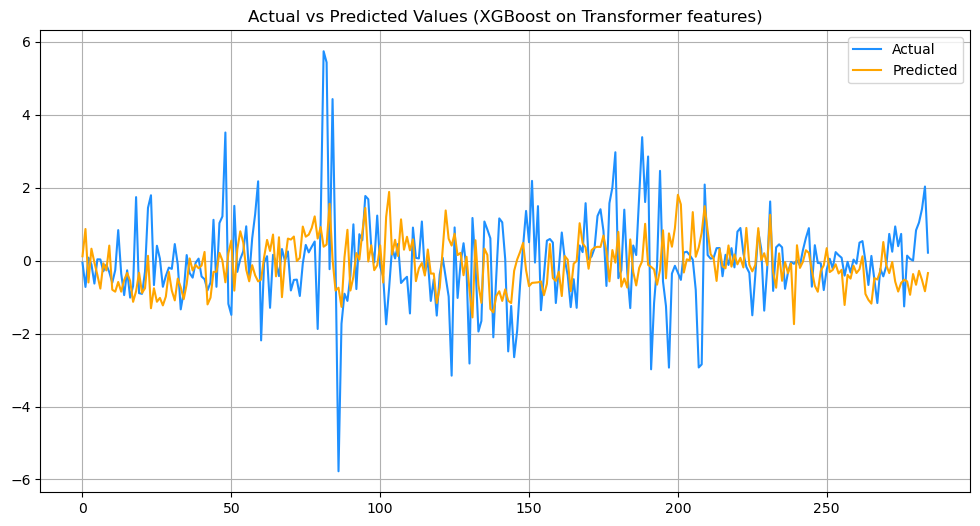

In [32]:
evaluate_predictions(all_labels, all_preds)

## 二分类

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import xgboost as xgb
import random

# ========== 全局超参 ==========
WINDOW_SIZE   = 36    # 滑动窗口长度
BATCH_SIZE    = 32
EPOCHS        = 20
LR            = 1e-3
SEED          = 114514

# ========== 设置随机种子 ==========
def seed_everything(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
seed_everything()

# ========== 特征和标签分离 ==========
# 假设 'df_clean' 已经是无缺失的 DataFrame，且'value'为0/1标签
# 滞后特征构造
for lag in range(1, WINDOW_SIZE+1):
    df_clean[f'value_lag_{lag}'] = df_clean['value_sort'].shift(lag)
df_clean = df_clean.dropna().reset_index(drop=True)

value_lag_cols = [f'value_lag_{lag}' for lag in range(1, WINDOW_SIZE+1)]
other_feature_cols = [col for col in df_clean.columns if col not in ['value_sort'] + value_lag_cols]
feature_cols = other_feature_cols + value_lag_cols
target_col = 'value_sort'

# 数值型特征
features = df_clean[feature_cols].astype(float).to_numpy()
target   = df_clean[target_col].astype(float).to_numpy()   # 0-1标签，float类型即可

# ========== 按时间顺序切分 ==========
split_idx = int(len(features) * 0.8)
train_x, test_x = features[:split_idx], features[split_idx:]
train_y, test_y = target[:split_idx],   target[split_idx:]

# ========== 特征标准化 ==========
scaler_x = StandardScaler()
train_x = scaler_x.fit_transform(train_x)
test_x  = scaler_x.transform(test_x)
# y不需要标准化！是0-1

# ========== Dataset & Dataloader ==========
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, window_size):
        self.X, self.y = [], []
        for i in range(len(X) - window_size):
            self.X.append(X[i:i+window_size, :])       # (window_size, feature_dim)
            self.y.append(y[i+window_size])            # 对应的目标值
        self.X = torch.tensor(self.X, dtype=torch.float32)  # shape: (samples, window_size, feature_dim)
        self.y = torch.tensor(self.y, dtype=torch.float32)  # shape: (samples,)
    
    def __len__(self):  
        return len(self.X)
    
    def __getitem__(self, idx):  
        return self.X[idx], self.y[idx]


train_ds = TimeSeriesDataset(train_x, train_y, WINDOW_SIZE)
test_ds  = TimeSeriesDataset(test_x,  test_y,  WINDOW_SIZE)
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False)

# ========== 位置编码 ==========
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe_tensor = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe_tensor[:, 0::2] = torch.sin(position * div_term)
        pe_tensor[:, 1::2] = torch.cos(position * div_term)
        pe_tensor = pe_tensor.unsqueeze(0)  # shape: [1, max_len, d_model]
        self.register_buffer('pe', pe_tensor)  # 正确注册

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]  # broadcasting over batch

# ========== Transformer 分类模型 ==========
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=64, nhead=4, num_layers=2, max_len=500):
        super().__init__()
        self.input_linear = nn.Linear(input_size, d_model)
        self.pos_encoder  = PositionalEncoding(d_model, max_len)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers)
        self.output_layer = nn.Linear(d_model, 1)
    def forward(self, x):
        x = self.input_linear(x)
        x = self.pos_encoder(x)
        h = self.encoder(x)
        out = self.output_layer(h[:, -1])
        return out.squeeze()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
D = train_ds[0][0].shape[1]
model = TransformerModel(input_size=D).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# ========== 训练 ==========
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0
    total_preds, total_labels = [], []
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        logits = model(X_batch)   # (B,)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        # 分类评估
        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).long().cpu().numpy()
        total_preds.extend(preds)
        total_labels.extend(y_batch.cpu().numpy())
    acc = accuracy_score(total_labels, total_preds)
    f1 = f1_score(total_labels, total_preds)
    print(f"Epoch {epoch+1:02d} | Train Loss: {running_loss/len(train_loader):.4f} | ACC: {acc:.4f} | F1: {f1:.4f}")

# ========== 测试评估 ==========
model.eval()
all_preds, all_labels, all_probs = [], [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        logits = model(X_batch)
        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).long().cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(y_batch.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())
acc = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
auc = roc_auc_score(all_labels, all_probs)
print(f"Test Accuracy: {acc:.4f} | F1: {f1:.4f} | AUC: {auc:.4f}")

# ========== 特征提取 ==========
@torch.no_grad()
def extract_features(model, X, y, window_size):
    model.eval()
    feats, tars = [], []
    for i in range(window_size, len(X)):
        x_seq = torch.tensor(X[i-window_size:i], dtype=torch.float32)
        x_seq = x_seq.unsqueeze(0).to(model.input_linear.weight.device)
        h = model.input_linear(x_seq)
        h = model.pos_encoder(h)
        h = model.encoder(h)
        feats.append(h[:, -1].squeeze().cpu().numpy())
        tars.append(y[i])
    return np.array(feats), np.array(tars)

# 提取特征
X_train_feats, y_train_feats = extract_features(model, train_x, train_y, WINDOW_SIZE)
print(X_train_feats.shape, y_train_feats.shape)
X_test_feats,  y_test_feats  = extract_features(model, test_x,  test_y,  WINDOW_SIZE)

# ========== XGBoost 分类 ==========
xgb_model = xgb.XGBClassifier(
    n_estimators=300, max_depth=5, learning_rate=0.05,
    subsample=0.8, colsample_bytree=0.8, random_state=SEED,
    use_label_encoder=False, eval_metric='logloss'
)
xgb_model.fit(X_train_feats, y_train_feats)

# 测试集评估
y_pred_xgb = xgb_model.predict(X_test_feats)
y_proba_xgb = xgb_model.predict_proba(X_test_feats)[:, 1]
print("XGBoost on Transformer features (Classification):")
print("ACC:", accuracy_score(y_test_feats, y_pred_xgb))
print("F1:", f1_score(y_test_feats, y_pred_xgb))
print("AUC:", roc_auc_score(y_test_feats, y_proba_xgb))

C:\Users\86198\AppData\Local\Temp\ipykernel_9696\2832040545.py:60: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\b\abs_34s6o8i12c\croot\libtorch_1751464457133\work\torch\csrc\utils\tensor_new.cpp:257.)
  self.X = torch.tensor(self.X, dtype=torch.float32)  # shape: (samples, window_size, feature_dim)


Epoch 01 | Train Loss: 0.7077 | ACC: 0.5523 | F1: 0.1799
Epoch 02 | Train Loss: 0.6721 | ACC: 0.6023 | F1: 0.3794
Epoch 03 | Train Loss: 0.6683 | ACC: 0.6031 | F1: 0.3347
Epoch 04 | Train Loss: 0.6499 | ACC: 0.6184 | F1: 0.4384
Epoch 05 | Train Loss: 0.6378 | ACC: 0.6498 | F1: 0.5267
Epoch 06 | Train Loss: 0.6282 | ACC: 0.6594 | F1: 0.4910
Epoch 07 | Train Loss: 0.6125 | ACC: 0.6731 | F1: 0.5616
Epoch 08 | Train Loss: 0.5788 | ACC: 0.7238 | F1: 0.6370
Epoch 09 | Train Loss: 0.5367 | ACC: 0.7496 | F1: 0.6784
Epoch 10 | Train Loss: 0.5127 | ACC: 0.7560 | F1: 0.6930
Epoch 11 | Train Loss: 0.4841 | ACC: 0.7842 | F1: 0.7309
Epoch 12 | Train Loss: 0.4584 | ACC: 0.7907 | F1: 0.7379
Epoch 13 | Train Loss: 0.3933 | ACC: 0.8382 | F1: 0.8031
Epoch 14 | Train Loss: 0.3692 | ACC: 0.8494 | F1: 0.8186
Epoch 15 | Train Loss: 0.3334 | ACC: 0.8631 | F1: 0.8362
Epoch 16 | Train Loss: 0.3081 | ACC: 0.8776 | F1: 0.8519
Epoch 17 | Train Loss: 0.2966 | ACC: 0.8849 | F1: 0.8621
Epoch 18 | Train Loss: 0.2690 |

d:\conda\envs\lau\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:58:35] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost on Transformer features (Classification):
ACC: 0.5070422535211268
F1: 0.4262295081967213
AUC: 0.4800907258064517


In [4]:
print(X_train_feats, y_train_feats)

[[ 0.05930966  1.3008472  -1.6632191  ... -0.25471258 -0.7597438
   1.1400747 ]
 [-1.6112542  -1.1371948   1.0159941  ... -0.17811726  0.04533558
  -0.26946285]
 [-0.18625717  1.3389751  -1.594436   ... -0.06604987 -0.85039496
   1.2107782 ]
 ...
 [-1.2004589   0.9085709  -0.7737337  ...  0.22632878 -1.2321407
   1.1530136 ]
 [-2.0216217  -0.5343898   0.8088241  ...  0.11203225 -0.68157846
   0.12798196]
 [-0.4195506  -1.7152889   1.4832574  ...  0.06853829  0.4797085
  -1.1766434 ]] [1. 0. 1. ... 1. 0. 0.]


In [7]:
import shap
import matplotlib.pyplot as plt

# 初始化SHAP解释器
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train_feats)  # shape: [num_samples, d_model]

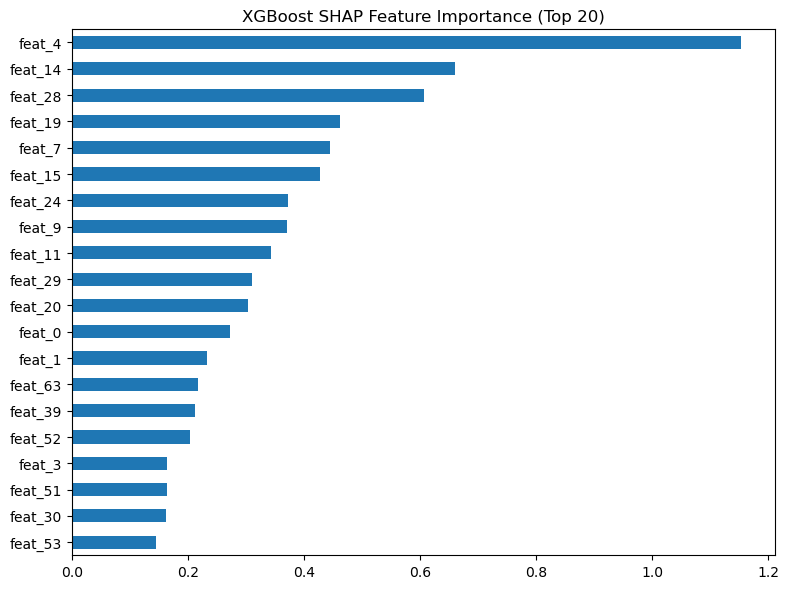

In [8]:
# 自动生成特征名
d_model = X_train_feats.shape[1]  # 例如 64
feature_names = [f"feat_{i}" for i in range(d_model)]

# 创建 DataFrame 用于可视化
shap_df = pd.DataFrame(shap_values, columns=feature_names)
mean_abs_shap = shap_df.abs().mean().sort_values(ascending=False)

# 条形图前20重要特征
top_k = 20
mean_abs_shap[:top_k].plot(kind='barh', figsize=(8,6))
plt.gca().invert_yaxis()
plt.title(f"XGBoost SHAP Feature Importance (Top {top_k})")
plt.tight_layout()
plt.show()


# RandomForest+Transformer

In [ ]:
import math
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import torch
import torch.nn as nn

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_layers, dim_feedforward):
        super().__init__()
        # 输入映射层
        input_linear = nn.Linear(input_dim, d_model)
        # Transformer 编码器层
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, dim_feedforward=dim_feedforward
        )
        transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        # 输出映射层
        output_linear = nn.Linear(d_model, 1)

    def forward(self, src):
        x = input_linear(src) * math.sqrt(input_linear.out_features)  # 线性变换
        x = x.permute(1, 0, 2)  # 转置为 (seq_len, batch, d_model)
        x = transformer(x)  # Transformer 编码
        x = x.mean(dim=0)  # 平均池化 (batch, d_model)
        return output_linear(x)
    
scaler = StandardScaler()
df_clean['date'] = df_clean['date'].view('int64')
data_norm = scaler.fit_transform(df_clean)  # 标准化后的数据

X, Y = [], []
T = len(data_norm)
window_size = 5  # 窗口大小
horizon = 1  # 预测的时间步长
target_col_idx = df_clean.columns.get_loc('value')

for i in range(T - window_size - horizon + 1):
    X.append(data_norm[i:i + window_size])  # 选择窗口内的数据
    target = data_norm[:, target_col_idx]                       # shape: (T,)
    Y.append(target[i + window_size : i + window_size + horizon])
X = np.array(X)  # shape: (samples, window_size, features)
Y = np.array(Y).squeeze(axis=1)  # shape: (samples, features)

# 划分训练集与测试集
train_ratio = 0.8
n_train = int(len(X) * train_ratio)
X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

# 转换为PyTorch Tensor
X_train_t = torch.tensor(X_train, dtype=torch.float32)
Y_train_t = torch.tensor(Y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
Y_test_t = torch.tensor(Y_test, dtype=torch.float32)

train_dataset = TensorDataset(X_train_t, Y_train_t)
train_loader  = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 定义训练参数
input_dim = X.shape[2]
model = TransformerRegressor(input_dim, d_model=64, nhead=4, num_layers=2, dim_feedforward=128)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# 训练模型
num_epochs = 100
loss_list = []

model.train()
for epoch in range(1, num_epochs+1):
    epoch_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
    epoch_loss /= len(train_loader.dataset)
    loss_list.append(epoch_loss)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs}, Loss: {epoch_loss:.4f}")

C:\Users\86198\AppData\Local\Temp\ipykernel_9136\1135216442.py:34: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df_clean['date'] = df_clean['date'].view('int64')
d:\conda\envs\lau\Lib\site-packages\torch\nn\modules\transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
d:\conda\envs\lau\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
d:\conda\envs\lau\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([26])) that is di

Epoch 10/100, Loss: 0.9245
Epoch 20/100, Loss: 0.9171
Epoch 30/100, Loss: 0.9171
Epoch 40/100, Loss: 0.9164
Epoch 50/100, Loss: 0.9149
Epoch 60/100, Loss: 0.9153
Epoch 70/100, Loss: 0.9152
Epoch 80/100, Loss: 0.9145
Epoch 90/100, Loss: 0.9152
Epoch 100/100, Loss: 0.9149


In [ ]:
# 随机森林训练与预测
from sklearn.ensemble import RandomForestRegressor
X_rf_train = X_train.reshape(n_train, -1)
X_rf_test = X_test.reshape(len(X_test), -1)

rf = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)
rf.fit(X_rf_train, Y_train)
rf_pred = rf.predict(X_rf_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_rf = mean_squared_error(Y_test, rf_pred)
mae_rf = mean_absolute_error(Y_test, rf_pred)

print(f"Random Forest -> MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}")

Random Forest -> MSE: 1.6093, MAE: 0.9272


In [ ]:
tf_pred_test = model(X_test_t).detach().numpy()
tf_pred_test = tf_pred_test.squeeze()   # (327,) 而不是 (327,1)
rf_pred      = rf_pred.squeeze()        # 通常本来就是 (327,)
alpha = 0.5  # 加权系数
ensemble_pred = alpha * tf_pred_test + (1 - alpha) * rf_pred

# 评估融合模型
mse_ens = mean_squared_error(Y_test, ensemble_pred)
mae_ens = mean_absolute_error(Y_test, ensemble_pred)

print(f"Ensemble -> MSE: {mse_ens:.4f}, MAE: {mae_ens:.4f}")

Ensemble -> MSE: 1.3904, MAE: 0.8383


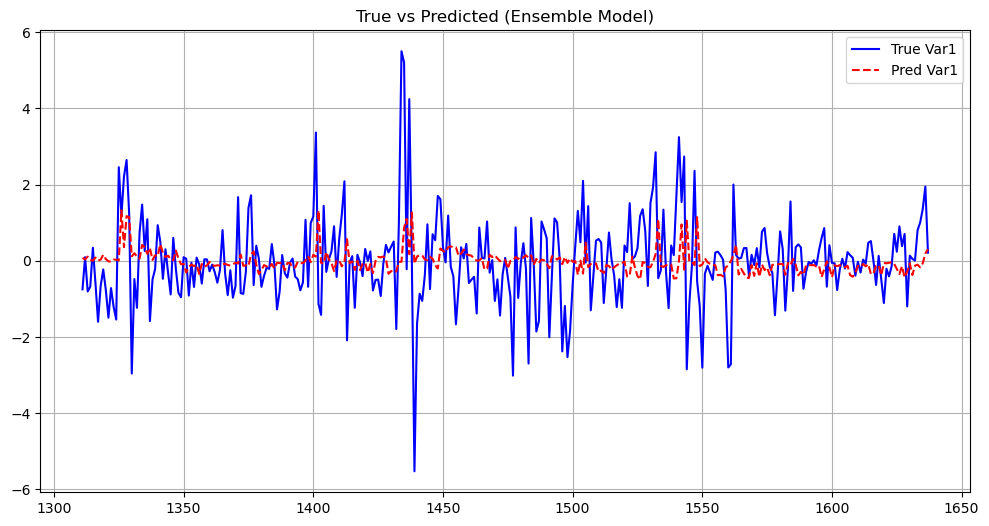

In [ ]:
plt.figure(figsize=(12, 6))
x_axis = np.arange(n_train + window_size, n_train + window_size + len(Y_test))
plt.plot(x_axis, Y_test,          color='blue', label='True Var1')
plt.plot(x_axis, ensemble_pred,   color='red',  linestyle='--', label='Pred Var1')
plt.title("True vs Predicted (Ensemble Model)")
plt.legend();  plt.grid(True)
plt.show()


Test MSE: 0.0009057420474177528
Test MAE: 0.020712336408515105


d:\conda\envs\lau\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\lau\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20538 (\N{CJK UNIFIED IDEOGRAPH-503A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


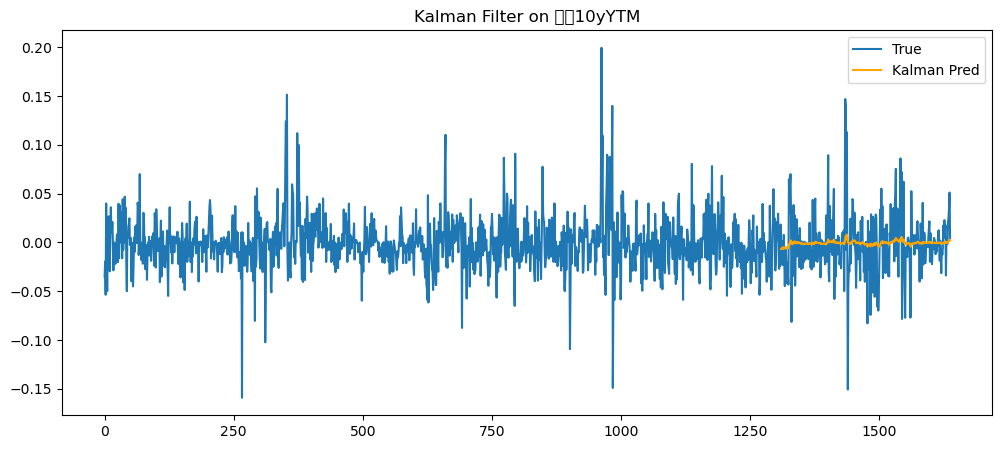

In [49]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

# 假设 df_clean['国债10yYTM'] 是目标序列
series = df_clean['value'].astype(float).to_numpy()

# 拆分训练/测试（比如80/20）
split_idx = int(len(series)*0.8)
train, test = series[:split_idx], series[split_idx:]

# === 拟合卡尔曼滤波器 ===
# 标准的一阶马尔可夫过程
# AR(2)例子
kf = KalmanFilter(
    transition_matrices = [[0, 1], [0.5, 0.3]],  # 你可以根据AR模型或手动设置
    observation_matrices = [1, 0],  # 只观测第一个分量
    initial_state_mean = [train[1], train[0]],
    initial_state_covariance = np.eye(2),
    observation_covariance = 1,
    transition_covariance = np.eye(2) * 0.01
)


# 用训练集做平滑和状态估计
state_means, _ = kf.filter(train)

# === 用训练集最后一个状态做测试集递推预测 ===
preds = []
state = state_means[-1]
cov = 1
for obs in test:
    state, cov = kf.filter_update(state, cov, observation=obs)
    preds.append(state[0])

# 评估
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Test MSE:", mean_squared_error(test, preds))
print("Test MAE:", mean_absolute_error(test, preds))

plt.figure(figsize=(12,5))
plt.plot(np.arange(len(series)), series, label='True')
plt.plot(np.arange(split_idx, len(series)), preds, label='Kalman Pred', color='orange')
plt.legend()
plt.title('Kalman Filter on 国债10yYTM')
plt.show()

# 滑窗滚动-逐步预测-Transformer

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

SEED = 114514
def seed_everything(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
seed_everything()

WINDOW_SIZE   = 12      # 特征滞后步数
SEQ_LENGTH    = 12      # Transformer滑窗长度
TRAIN_WINDOW  = 120     # 每一步历史训练样本数
EPOCHS        = 5       # 每一步训练轮数
LR            = 1e-3

In [118]:
# 假设'value'为连续变量
df_clean['label'] = (df_clean['value'].diff().shift(-1) > 0).astype(int)
df_clean = df_clean.dropna().reset_index(drop=True)
for lag in range(1, WINDOW_SIZE+1):
    df_clean[f'value_lag_{lag}'] = df_clean['value'].shift(lag)
df_clean = df_clean.dropna().reset_index(drop=True)

value_lag_cols = [f'value_lag_{lag}' for lag in range(1, WINDOW_SIZE+1)]
other_feature_cols = [col for col in df_clean.columns if col not in ['value', 'label'] + value_lag_cols]
feature_cols = other_feature_cols + value_lag_cols
target_col = 'label'  # 分类目标
df_clean['date'] = df_clean['date'].astype('int64')

features = df_clean[feature_cols].astype(float).to_numpy()
target   = df_clean[target_col].astype(float).to_numpy()
dates    = df_clean['date'].values if 'date' in df_clean.columns else np.arange(len(df_clean))
# ========== 按时间顺序切分 ==========
split_idx = int(len(features) * 0.8)
train_x, test_x = features[:split_idx], features[split_idx:]
train_y, test_y = target[:split_idx],   target[split_idx:]
test_dates = dates[split_idx:]

scaler_x = StandardScaler()
train_x = scaler_x.fit_transform(train_x)
test_x  = scaler_x.transform(test_x)

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        self.pe = torch.zeros(max_len, d_model)
        self.position = torch.arange(0, max_len).unsqueeze(1)
        self.div_term = torch.exp(torch.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))
        self.pe[:, 0::2] = torch.sin(self.position * self.div_term)
        self.pe[:, 1::2] = torch.cos(self.position * self.div_term)
        self.pe = self.pe.unsqueeze(0)
        self.register_buffer('pe', self.pe)
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=64, nhead=4, num_layers=2, max_len=500):
        super().__init__()
        self.input_linear = nn.Linear(input_size, d_model)
        self.pos_encoder  = PositionalEncoding(d_model, max_len)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers)
        self.output_layer = nn.Linear(d_model, 1)
    def forward(self, x):      # (B, L, D)
        x = self.input_linear(x)
        x = self.pos_encoder(x)
        h = self.encoder(x)
        out = self.output_layer(h[:, -1])
        return torch.sigmoid(out.squeeze())  # 分类输出sigmoid


In [120]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
D = train_x.shape[1]
preds_probs, preds_labels, labels, pred_dates = [], [], [], []

for i in tqdm(range(len(test_x) - SEQ_LENGTH)):
    # 当前预测点在test区间的索引
    test_idx = i
    test_X_seq = test_x[test_idx:test_idx+SEQ_LENGTH, :]
    test_y_true = test_y[test_idx + SEQ_LENGTH]
    test_date = test_dates[test_idx + SEQ_LENGTH]

    # 历史训练窗口
    train_end = split_idx + test_idx
    train_start = max(0, train_end - TRAIN_WINDOW)
    X_hist = np.vstack([train_x, test_x[:test_idx, :]])
    y_hist = np.concatenate([train_y, test_y[:test_idx]])
    X_train_win = X_hist[train_start:train_end, :]
    y_train_win = y_hist[train_start:train_end]

    # 滑窗样本
    X_tr_seqs, y_tr_seqs = [], []
    for j in range(len(X_train_win) - SEQ_LENGTH):
        X_tr_seqs.append(X_train_win[j:j+SEQ_LENGTH, :])
        y_tr_seqs.append(y_train_win[j+SEQ_LENGTH])
    X_tr_seqs = np.array(X_tr_seqs)
    y_tr_seqs = np.array(y_tr_seqs)

    # PyTorch Dataset
    X_train_tensor = torch.tensor(X_tr_seqs, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_tr_seqs, dtype=torch.float32)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    batch_size = min(32, len(train_dataset))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # 新建模型
    model = TransformerModel(input_size=D).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    criterion = nn.BCELoss()

    for epoch in range(EPOCHS):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            preds_batch = model(X_batch)
            loss = criterion(preds_batch, y_batch)
            loss.backward()
            optimizer.step()

    # 单点预测
    model.eval()
    X_test_tensor = torch.tensor(np.expand_dims(test_X_seq, axis=0), dtype=torch.float32).to(device)
    with torch.no_grad():
        prob = model(X_test_tensor).cpu().numpy().item()
    pred_label = int(prob > 0.5)

    preds_probs.append(prob)
    preds_labels.append(pred_label)
    labels.append(test_y_true)
    pred_dates.append(test_date)

100%|██████████| 303/303 [01:56<00:00,  2.59it/s]


Classification Report:
Accuracy: 0.45544554455445546
F1: 0.4891640866873065
AUC: 0.4650270364556079
Confusion Matrix:
 [[59 88]
 [77 79]]


d:\conda\envs\lau\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28369 (\N{CJK UNIFIED IDEOGRAPH-6ED1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\lau\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31383 (\N{CJK UNIFIED IDEOGRAPH-7A97}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\lau\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 28378 (\N{CJK UNIFIED IDEOGRAPH-6EDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\lau\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
d:\conda\envs\lau\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

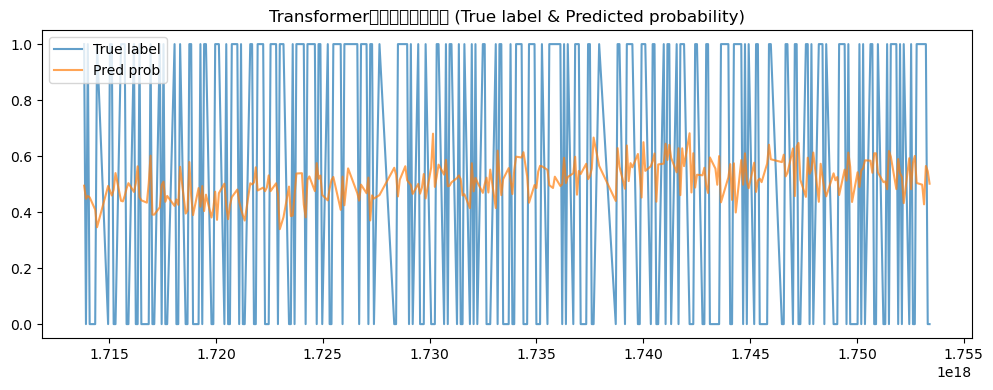

In [121]:
print("Classification Report:")
print("Accuracy:", accuracy_score(labels, preds_labels))
print("F1:", f1_score(labels, preds_labels))
print("AUC:", roc_auc_score(labels, preds_probs))
print("Confusion Matrix:\n", confusion_matrix(labels, preds_labels))

plt.figure(figsize=(12,4))
plt.plot(pred_dates, labels, label='True label', alpha=0.7)
plt.plot(pred_dates, preds_probs, label='Pred prob', alpha=0.7)
plt.legend()
plt.title('Transformer滑窗滚动分类预测 (True label & Predicted probability)')
plt.show()

# LSTM

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import torch.optim as optim

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(2023)

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=2, dropout_rate=0.3):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_rate)
        self.attention = nn.Linear(hidden_dim, 1, bias=False)
        self.fc = nn.Linear(hidden_dim, 1)
        self.layer_norm = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self._init_weights()
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)  # (batch, seq_len, 1)
        context = torch.sum(lstm_out * attn_weights, dim=1)  # (batch, hidden_dim)
        context = self.layer_norm(context)
        context = self.dropout(context)
        out = self.fc(context)
        return torch.sigmoid(out)
    def _init_weights(self):
        for name, param in self.named_parameters():
            if 'weight' in name and len(param.shape) > 1:
                nn.init.kaiming_uniform_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)

def create_sequences(data: pd.DataFrame, feature_cols: list, label_col: str, window_size=5):
    X, y = [], []
    feature_data = data[feature_cols]
    label_data = data[label_col]
    for i in range(len(data) - window_size):
        seq_features = feature_data.iloc[i:i+window_size].values
        label = label_data.iloc[i+window_size]
        X.append(seq_features)
        y.append(label)
    return np.array(X), np.array(y)

def run_rolling_lstm_forecast(df: pd.DataFrame, label_col: str, seq_length=5, train_window=120, epochs=5, lr=1e-3, test_start_date=None):
    # 自动选取所有数值型特征，不含label_col本身
    feature_cols = [col for col in df.columns if col != label_col and np.issubdtype(df[col].dtype, np.number)]
    df = df.dropna(subset=feature_cols + [label_col]).reset_index(drop=True)

    # 如果有时间index，并指定了test_start_date，则按时间分割，否则按8:2比例
    if test_start_date and isinstance(df.index, pd.DatetimeIndex):
        test_start = df.index.get_loc(test_start_date)
    else:
        test_start = int(len(df) * 0.8)

    train_df = df.iloc[:test_start]
    test_df = df.iloc[test_start:]

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_dim = len(feature_cols)

    preds_probs, preds_labels, labels, pred_dates = [], [], [], []

    for i in tqdm(range(len(test_df) - seq_length)):
        # 滚动构造训练数据
        hist_start = max(0, test_start + i - train_window - seq_length)
        hist_end = test_start + i
        train_window_df = df.iloc[hist_start:hist_end + seq_length]

        if len(train_window_df) < seq_length + 1:
            continue

        X_train, y_train = create_sequences(train_window_df, feature_cols, label_col, window_size=seq_length)
        X_test = test_df[feature_cols].iloc[i:i+seq_length].values
        y_test = test_df[label_col].iloc[i+seq_length]

        if X_test.shape[0] != seq_length:
            continue

        # 转换成torch张量
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
        X_test_tensor = torch.tensor(np.array([X_test]), dtype=torch.float32).to(device)

        train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
        batch_size = min(64, len(train_dataset))
        if batch_size < 1:
            continue
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        # 新建模型
        model = LSTMModel(input_dim).to(device)
        optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-5)
        criterion = nn.BCELoss()

        # 训练
        for ep in range(epochs):
            model.train()
            for data, target in train_loader:
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()

        # 预测
        model.eval()
        with torch.no_grad():
            prob = model(X_test_tensor).cpu().numpy()[0][0]
            pred_label = int(prob > 0.5)

        preds_probs.append(prob)
        preds_labels.append(pred_label)
        labels.append(y_test)
        if hasattr(test_df, "index"):
            pred_dates.append(test_df.index[i+seq_length])
        else:
            pred_dates.append(i+seq_length)

    # 返回DataFrame结果
    result_df = pd.DataFrame({
        "date": pred_dates,
        "true": labels,
        "pred_prob": preds_probs,
        "pred_label": preds_labels
    })
    return result_df


result = run_rolling_lstm_forecast(df_clean, label_col='value_sort', seq_length=5, train_window=120, epochs=10, lr=1e-3)

# 输出效果和分析
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(result['true'], result['pred_label']))
print("AUC:", roc_auc_score(result['true'], result['pred_prob']))
print("F1:", f1_score(result['true'], result['pred_label']))
print("CM:\n", confusion_matrix(result['true'], result['pred_label']))

100%|██████████| 322/322 [01:29<00:00,  3.59it/s]


Accuracy: 0.5652173913043478
AUC: 0.5345384373030876
F1: 0.375
CM:
 [[140  44]
 [ 96  42]]


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import torch.optim as optim

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(2023)

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=3, dropout_rate=0.3):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_rate)
        self.attention = nn.Linear(hidden_dim, 1, bias=False)
        self.fc = nn.Linear(hidden_dim, 1)
        self.layer_norm = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self._init_weights()
    def forward(self, x):
        self.lstm_out, _ = self.lstm(x)
        self.attn_weights = torch.softmax(self.attention(self.lstm_out), dim=1)  # (batch, seq_len, 1)
        self.context = torch.sum(self.lstm_out * self.attn_weights, dim=1)  # (batch, hidden_dim)
        self.context = self.layer_norm(self.context)
        self.context = self.dropout(self.context)
        self.out = self.fc(self.context)
        return torch.sigmoid(self.out)
    def _init_weights(self):
        for name, param in self.named_parameters():
            if 'weight' in name and len(param.shape) > 1:
                nn.init.kaiming_uniform_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)

def create_sequences(data: pd.DataFrame, feature_cols: list, label_col: str, window_size=5):
    X, y = [], []
    feature_data = data[feature_cols]
    label_data = data[label_col]
    for i in range(len(data) - window_size):
        seq_features = feature_data.iloc[i:i+window_size].values
        label = label_data.iloc[i+window_size]
        X.append(seq_features)
        y.append(label)
    return np.array(X), np.array(y)

def run_online_rolling_lstm_forecast(df: pd.DataFrame, label_col: str, seq_length=5, train_window=120, epochs=5, lr=1e-3, test_start_date=None):
    feature_cols = [col for col in df.columns if col != label_col and np.issubdtype(df[col].dtype, np.number)]
    df = df.dropna(subset=feature_cols + [label_col]).reset_index(drop=True)

    if test_start_date and isinstance(df.index, pd.DatetimeIndex):
        test_start = df.index.get_loc(test_start_date)
    else:
        test_start = int(len(df) * 0.8)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_dim = len(feature_cols)

    # === 只初始化一次模型和优化器 ===
    model = LSTMModel(input_dim).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-5)
    criterion = nn.BCELoss()

    preds_probs, preds_labels, labels, pred_dates = [], [], [], []

    for ep in range(epochs):
        print(f"Epoch {ep+1}/{epochs}")
        model.train()  # 保证模式一致
        for i in tqdm(range(len(df) - test_start - seq_length)):
            pred_idx = test_start + i + seq_length - 1
            hist_end = test_start + i
            hist_start = max(0, hist_end - train_window)

            train_window_df = df.iloc[hist_start:hist_end+seq_length]

            if len(train_window_df) < seq_length + 1:
                continue

            X_train, y_train = create_sequences(train_window_df, feature_cols, label_col, window_size=seq_length)
            X_test = df[feature_cols].iloc[pred_idx - seq_length + 1:pred_idx + 1].values
            y_test = df[label_col].iloc[pred_idx]

            if X_test.shape[0] != seq_length:
                continue

            X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
            y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
            X_test_tensor = torch.tensor(np.array([X_test]), dtype=torch.float32).to(device)

            train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
            batch_size = min(64, len(train_dataset))
            if batch_size < 1:
                continue
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

            # 训练
            for data, target in train_loader:
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()

            # 预测
            model.eval()
            with torch.no_grad():
                prob = model(X_test_tensor).cpu().numpy()[0][0]
                pred_label = int(prob > 0.5)
            model.train()  # 回到train模式

            # 只保存最后一个epoch的预测
            if ep == epochs - 1:
                preds_probs.append(prob)
                preds_labels.append(pred_label)
                labels.append(y_test)
                if hasattr(df, "index"):
                    pred_dates.append(df.index[pred_idx])
                else:
                    pred_dates.append(pred_idx)

    result_df = pd.DataFrame({
        "date": pred_dates,
        "true": labels,
        "pred_prob": preds_probs,
        "pred_label": preds_labels
    })
    return result_df
result = run_online_rolling_lstm_forecast(df_clean, label_col='value_sort', seq_length=15, train_window=140, epochs=15, lr=1e-4)
# 输出效果和分析
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
print("Accuracy:", accuracy_score(result['true'], result['pred_label']))
print("AUC:", roc_auc_score(result['true'], result['pred_prob']))
print("F1:", f1_score(result['true'], result['pred_label']))
print("CM:\n", confusion_matrix(result['true'], result['pred_label']))

Epoch 1/15


100%|██████████| 307/307 [01:10<00:00,  4.33it/s]


Epoch 2/15


100%|██████████| 307/307 [01:32<00:00,  3.31it/s]


Epoch 3/15


100%|██████████| 307/307 [01:34<00:00,  3.25it/s]


Epoch 4/15


100%|██████████| 307/307 [01:35<00:00,  3.21it/s]


Epoch 5/15


100%|██████████| 307/307 [01:36<00:00,  3.20it/s]


Epoch 6/15


100%|██████████| 307/307 [01:38<00:00,  3.12it/s]


Epoch 7/15


100%|██████████| 307/307 [01:40<00:00,  3.06it/s]


Epoch 8/15


100%|██████████| 307/307 [01:43<00:00,  2.98it/s]


Epoch 9/15


100%|██████████| 307/307 [01:45<00:00,  2.91it/s]


Epoch 10/15


100%|██████████| 307/307 [01:44<00:00,  2.93it/s]


Epoch 11/15


100%|██████████| 307/307 [01:46<00:00,  2.89it/s]


Epoch 12/15


100%|██████████| 307/307 [01:46<00:00,  2.88it/s]


Epoch 13/15


100%|██████████| 307/307 [01:47<00:00,  2.84it/s]


Epoch 14/15


100%|██████████| 307/307 [01:50<00:00,  2.79it/s]


Epoch 15/15


100%|██████████| 307/307 [01:49<00:00,  2.79it/s]

Accuracy: 0.6156351791530945
AUC: 0.6995238095238094
F1: 0.5461538461538461
CM:
 [[118  57]
 [ 61  71]]


# 贝叶斯优化

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import torch.optim as optim
import optuna
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# 固定随机种子
def set_seed(seed=2023):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(2023)

# LSTM模型，支持激活/层数/dropout等超参
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=3, dropout_rate=0.3, activation='none'):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_rate if num_layers > 1 else 0)
        self.attention = nn.Linear(hidden_dim, 1, bias=False)
        self.fc = nn.Linear(hidden_dim, 1)
        self.layer_norm = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(dropout_rate)
        if activation == 'relu':
            self.act = nn.ReLU()
        elif activation == 'tanh':
            self.act = nn.Tanh()
        elif activation == 'leakyrelu':
            self.act = nn.LeakyReLU(0.1)       
        self._init_weights()
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context = torch.sum(lstm_out * attn_weights, dim=1)
        context = self.layer_norm(context)
        context = self.act(context)
        context = self.dropout(context)
        out = self.fc(context)
        return torch.sigmoid(out)
    def _init_weights(self):
        for name, param in self.named_parameters():
            if 'weight' in name and len(param.shape) > 1:
                nn.init.kaiming_uniform_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)

# 滑动窗口特征构造
def create_sequences(data: pd.DataFrame, feature_cols: list, label_col: str, window_size=5):
    X, y = [], []
    feature_data = data[feature_cols]
    label_data = data[label_col]
    for i in range(len(data) - window_size):
        seq_features = feature_data.iloc[i:i+window_size].values
        label = label_data.iloc[i+window_size]
        X.append(seq_features)
        y.append(label)
    return np.array(X), np.array(y)

# 主训练+预测流程，支持全部超参
def run_online_rolling_lstm_forecast(
    df: pd.DataFrame, label_col: str, seq_length=5, train_window=120,
    epochs=5, lr=1e-3, num_layers=3, dropout_rate=0.3, activation='none', lr_decay=None,
    verbose=False
):
    feature_cols = [col for col in df.columns if col != label_col and np.issubdtype(df[col].dtype, np.number)]
    df = df.dropna(subset=feature_cols + [label_col]).reset_index(drop=True)
    test_start = int(len(df) * 0.8)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_dim = len(feature_cols)
    model = LSTMModel(input_dim, num_layers=num_layers, dropout_rate=dropout_rate, activation=activation).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-5)
    if lr_decay is not None:
        scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=lr_decay)
    criterion = nn.BCELoss()
    preds_probs, preds_labels, labels, pred_dates = [], [], [], []
    for ep in range(epochs):
        if verbose:
            print(f"Epoch {ep+1}/{epochs}")
        model.train()
        for i in range(len(df) - test_start - seq_length):
            pred_idx = test_start + i + seq_length - 1
            hist_end = test_start + i
            hist_start = max(0, hist_end - train_window)
            train_window_df = df.iloc[hist_start:hist_end+seq_length]
            if len(train_window_df) < seq_length + 1:
                continue
            X_train, y_train = create_sequences(train_window_df, feature_cols, label_col, window_size=seq_length)
            X_test = df[feature_cols].iloc[pred_idx - seq_length + 1:pred_idx + 1].values
            y_test = df[label_col].iloc[pred_idx]
            if X_test.shape[0] != seq_length:
                continue
            X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
            y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
            X_test_tensor = torch.tensor(np.array([X_test]), dtype=torch.float32).to(device)
            train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
            batch_size = min(64, len(train_dataset))
            if batch_size < 1:
                continue
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            for data, target in train_loader:
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
            model.eval()
            with torch.no_grad():
                prob = model(X_test_tensor).cpu().numpy()[0][0]
                pred_label = int(prob > 0.5)
            model.train()
            if ep == epochs - 1:
                preds_probs.append(prob)
                preds_labels.append(pred_label)
                labels.append(y_test)
                if hasattr(df, "index"):
                    pred_dates.append(df.index[pred_idx])
                else:
                    pred_dates.append(pred_idx)
        if lr_decay is not None:
            scheduler.step()
    result_df = pd.DataFrame({
        "date": pred_dates,
        "true": labels,
        "pred_prob": preds_probs,
        "pred_label": preds_labels
    })
    return result_df

# ========== 下面是Optuna贝叶斯调参主循环 ==========

def objective(trial):
    seq_length = trial.suggest_int('seq_length', 3, 15)                 # 5到25之间所有整数
    # 或带步长（比如每隔5试一次）： trial.suggest_int('seq_length', 5, 25, step=5)
    train_window = trial.suggest_int('train_window', 80, 200)           # 80到200之间所有整数
    epochs = trial.suggest_int('epochs', 10, 20)                        # 10到20之间所有整数
    num_layers = trial.suggest_int('num_layers', 2, 6)                  # 2到6之间所有整数
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)        # 0.0到0.5之间连续值
    lr = trial.suggest_float('lr', 1e-5, 1e-3, log=True)                # 学习率对数采样
    lr_decay = trial.suggest_float('lr_decay', 0.9, 0.999, step=0.01)   # 学习率衰减
    activation = trial.suggest_categorical('activation', ['relu', 'leaky_relu', 'tanh'])


    result = run_online_rolling_lstm_forecast(
        df_clean, label_col='value_sort',
        seq_length=seq_length, train_window=train_window, epochs=epochs,
        lr=lr, dropout_rate=dropout_rate, activation=activation, num_layers=num_layers,
        lr_decay=lr_decay, verbose=False
    )
    auc = roc_auc_score(result['true'], result['pred_prob'])
    acc = accuracy_score(result['true'], result['pred_label'])
    f1 = f1_score(result['true'], result['pred_label'])
    trial.set_user_attr('acc', acc)
    trial.set_user_attr('auc', auc)
    trial.set_user_attr('f1', f1)
    return auc   # 优化目标

# ========== 启动贝叶斯搜索 ==========

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)   # 试30组，越大越好

# ========== 结果保存到Excel ==========

def save_optuna_results(study, filename='optuna_lstm_results.xlsx'):
    rows = []
    for t in study.trials:
        record = t.params.copy()
        record.update({k: t.user_attrs[k] for k in t.user_attrs})
        record['auc'] = t.user_attrs['auc']
        record['acc'] = t.user_attrs['acc']
        record['f1'] = t.user_attrs['f1']
        record['optuna_value'] = t.value
        rows.append(record)
    df_result = pd.DataFrame(rows)
    df_result = df_result.sort_values('auc', ascending=False)
    df_result.to_excel(filename, index=False)
    print('结果已保存到', filename)
    return df_result

df_result = save_optuna_results(study)
print(df_result.head())

[I 2025-08-04 13:27:43,752] A new study created in memory with name: no-name-cfcf146e-3a03-42f8-8c85-06bf62aa7164
d:\conda\envs\lau\Lib\site-packages\optuna\distributions.py:687: UserWarning: The distribution is specified by [0.9, 0.999] and step=0.01, but the range is not divisible by `step`. It will be replaced by [0.9, 0.99].
  warnings.warn(
[I 2025-08-04 13:35:43,097] Trial 0 finished with value: 0.7444038668098818 and parameters: {'seq_length': 14, 'train_window': 116, 'epochs': 12, 'num_layers': 3, 'dropout_rate': 0.0870827431159929, 'lr': 1.7727517066647587e-05, 'lr_decay': 0.98, 'activation': 'tanh'}. Best is trial 0 with value: 0.7444038668098818.
d:\conda\envs\lau\Lib\site-packages\optuna\distributions.py:687: UserWarning: The distribution is specified by [0.9, 0.999] and step=0.01, but the range is not divisible by `step`. It will be replaced by [0.9, 0.99].
  warnings.warn(


In [6]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

# 固定随机种子
def set_seed(seed=2023):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed(2023)

# LSTM模型
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=3, dropout_rate=0.3, activation='none'):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_rate if num_layers > 1 else 0)
        self.attention = nn.Linear(hidden_dim, 1, bias=False)
        self.fc = nn.Linear(hidden_dim, 1)
        self.layer_norm = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(dropout_rate)
        if activation == 'relu':
            self.act = nn.ReLU()
        elif activation == 'tanh':
            self.act = nn.Tanh()
        elif activation in ['leakyrelu', 'leaky_relu']:
            self.act = nn.LeakyReLU()
        else:
            self.act = nn.Identity()
        self._init_weights()
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        attn_weights = torch.softmax(self.attention(lstm_out), dim=1)
        context = torch.sum(lstm_out * attn_weights, dim=1)
        context = self.layer_norm(context)
        context = self.act(context)
        context = self.dropout(context)
        out = self.fc(context)
        return torch.sigmoid(out)
    def _init_weights(self):
        for name, param in self.named_parameters():
            if 'weight' in name and len(param.shape) > 1:
                nn.init.kaiming_uniform_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)

# 滑动窗口特征构造
def create_sequences(data: pd.DataFrame, feature_cols: list, label_col: str, window_size=5):
    X, y = [], []
    feature_data = data[feature_cols]
    label_data = data[label_col]
    for i in range(len(data) - window_size):
        seq_features = feature_data.iloc[i:i+window_size].values
        label = label_data.iloc[i+window_size]
        X.append(seq_features)
        y.append(label)
    return np.array(X), np.array(y)

# 主训练+预测流程
def run_online_rolling_lstm_forecast(
    df: pd.DataFrame, label_col: str, seq_length=5, train_window=120,
    epochs=5, lr=1e-3, num_layers=3, dropout_rate=0.3, activation='none', lr_decay=None,
    verbose=True
):
    feature_cols = [col for col in df.columns if col != label_col and np.issubdtype(df[col].dtype, np.number)]
    df = df.dropna(subset=feature_cols + [label_col]).reset_index(drop=True)
    test_start = int(len(df) * 0.8)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    input_dim = len(feature_cols)
    model = LSTMModel(input_dim, num_layers=num_layers, dropout_rate=dropout_rate, activation=activation).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-5)
    if lr_decay is not None:
        scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=lr_decay)
    criterion = nn.BCELoss()
    preds_probs, preds_labels, labels, pred_dates = [], [], [], []
    for ep in range(epochs):
        if verbose:
            print(f"Epoch {ep+1}/{epochs}")
        model.train()
        for i in tqdm(range(len(df) - test_start - seq_length), disable=not verbose):
            pred_idx = test_start + i + seq_length - 1
            hist_end = test_start + i
            hist_start = max(0, hist_end - train_window)
            train_window_df = df.iloc[hist_start:hist_end+seq_length]
            if len(train_window_df) < seq_length + 1:
                continue
            X_train, y_train = create_sequences(train_window_df, feature_cols, label_col, window_size=seq_length)
            X_test = df[feature_cols].iloc[pred_idx - seq_length + 1:pred_idx + 1].values
            y_test = df[label_col].iloc[pred_idx]
            if X_test.shape[0] != seq_length:
                continue
            X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
            y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
            X_test_tensor = torch.tensor(np.array([X_test]), dtype=torch.float32).to(device)
            train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
            batch_size = min(64, len(train_dataset))
            if batch_size < 1:
                continue
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            for data, target in train_loader:
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
            model.eval()
            with torch.no_grad():
                prob = model(X_test_tensor).cpu().numpy()[0][0]
                pred_label = int(prob > 0.5)
            model.train()
            if ep == epochs - 1:
                preds_probs.append(prob)
                preds_labels.append(pred_label)
                labels.append(y_test)
                if hasattr(df, "index"):
                    pred_dates.append(df.index[pred_idx])
                else:
                    pred_dates.append(pred_idx)
        if lr_decay is not None:
            scheduler.step()
            if verbose:
                print(f"Current LR: {optimizer.param_groups[0]['lr']:.6f}")
    result_df = pd.DataFrame({
        "date": pred_dates,
        "true": labels,
        "pred_prob": preds_probs,
        "pred_label": preds_labels
    })
    return result_df

# ========== 使用你最佳参数预测 ==========
# 请将 best_params 换成你实际最优结果！
best_params = {
    'seq_length': 10,
    'train_window': 125,
    'epochs': 18,
    'lr': 0.000025979012295727,
    'dropout_rate': 0.45571,
    'activation': 'leaky_relu',
    'num_layers': 2,
    'lr_decay': 0.98,  # 如果不用衰减可设为None
}

result = run_online_rolling_lstm_forecast(
    df_clean, label_col='value_sort',
    seq_length=best_params['seq_length'],
    train_window=best_params['train_window'],
    epochs=best_params['epochs'],
    lr=best_params['lr'],
    dropout_rate=best_params['dropout_rate'],
    activation=best_params['activation'],
    num_layers=best_params['num_layers'],
    lr_decay=best_params['lr_decay'],
    verbose=True
)

# ========== 评估 ==========
print("Accuracy:", accuracy_score(result['true'], result['pred_label']))
print("AUC:", roc_auc_score(result['true'], result['pred_prob']))
print("F1:", f1_score(result['true'], result['pred_label']))
print("CM:\n", confusion_matrix(result['true'], result['pred_label']))

# ========== 保存结果 ==========
result.to_excel('lstm_best_param_results.xlsx', index=False)
print("结果已保存到 lstm_best_param_results.xlsx")

Epoch 1/18


100%|██████████| 317/317 [00:15<00:00, 20.17it/s]


Current LR: 0.000025
Epoch 2/18


100%|██████████| 317/317 [00:23<00:00, 13.76it/s]


Current LR: 0.000025
Epoch 3/18


100%|██████████| 317/317 [00:37<00:00,  8.51it/s]


Current LR: 0.000024
Epoch 4/18


100%|██████████| 317/317 [00:37<00:00,  8.41it/s]


Current LR: 0.000024
Epoch 5/18


100%|██████████| 317/317 [00:31<00:00, 10.05it/s]


Current LR: 0.000023
Epoch 6/18


100%|██████████| 317/317 [00:18<00:00, 17.42it/s]


Current LR: 0.000023
Epoch 7/18


100%|██████████| 317/317 [00:37<00:00,  8.44it/s]


Current LR: 0.000023
Epoch 8/18


100%|██████████| 317/317 [00:38<00:00,  8.31it/s]


Current LR: 0.000022
Epoch 9/18


100%|██████████| 317/317 [00:25<00:00, 12.32it/s]


Current LR: 0.000022
Epoch 10/18


100%|██████████| 317/317 [00:15<00:00, 20.78it/s]


Current LR: 0.000021
Epoch 11/18


100%|██████████| 317/317 [00:15<00:00, 20.30it/s]


Current LR: 0.000021
Epoch 12/18


100%|██████████| 317/317 [00:14<00:00, 21.38it/s]


Current LR: 0.000020
Epoch 13/18


100%|██████████| 317/317 [00:15<00:00, 20.71it/s]


Current LR: 0.000020
Epoch 14/18


100%|██████████| 317/317 [00:15<00:00, 20.03it/s]


Current LR: 0.000020
Epoch 15/18


100%|██████████| 317/317 [00:16<00:00, 19.69it/s]


Current LR: 0.000019
Epoch 16/18


100%|██████████| 317/317 [00:29<00:00, 10.78it/s]


Current LR: 0.000019
Epoch 17/18


100%|██████████| 317/317 [00:30<00:00, 10.29it/s]


Current LR: 0.000018
Epoch 18/18


100%|██████████| 317/317 [00:36<00:00,  8.61it/s]


Current LR: 0.000018
Accuracy: 0.668769716088328
AUC: 0.7386050283860504
F1: 0.5414847161572053
CM:
 [[150  30]
 [ 75  62]]


PermissionError: [Errno 13] Permission denied: 'lstm_best_param_results.xlsx'

# 贝叶斯优化-transformer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import xgboost as xgb
import random
import optuna
from tqdm import tqdm

# ========== 全局超参 ==========
WINDOW_SIZE = 36
BATCH_SIZE = 32
EPOCHS = 5
SEED = 114514

# ========== 设置随机种子 ==========
def seed_everything(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
seed_everything()

# ========== 假设 df_clean 已加载且无缺失 ==========
# 滞后特征生成
for lag in range(1, WINDOW_SIZE+1):
    df_clean[f'value_lag_{lag}'] = df_clean['value_sort'].shift(lag)
df_clean = df_clean.dropna().reset_index(drop=True)

# ========== Dataset类 ==========
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, window_size):
        self.X, self.y = [], []
        for i in range(len(X) - window_size):
            self.X.append(X[i:i+window_size, :])
            self.y.append(y[i+window_size])
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32)
    def __len__(self):  return len(self.X)
    def __getitem__(self, idx):  return self.X[idx], self.y[idx]

# ========== 位置编码 ==========
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe_tensor = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe_tensor[:, 0::2] = torch.sin(position * div_term)
        pe_tensor[:, 1::2] = torch.cos(position * div_term)
        pe_tensor = pe_tensor.unsqueeze(0)
        self.register_buffer('pe', pe_tensor)
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# ========== Transformer模型 ==========
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model, nhead, num_layers, max_len=500, dropout=0.1):
        super().__init__()
        self.input_linear = nn.Linear(input_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, max_len)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True, dropout=dropout)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers)
        self.output_layer = nn.Linear(d_model, 1)
    def forward(self, x):
        x = self.input_linear(x)
        x = self.pos_encoder(x)
        h = self.encoder(x)
        out = self.output_layer(h[:, -1])
        return out.squeeze()

# ========== 滚动训练 + 特征提取 ==========
def run_rolling_transformer_xgb(df, window_size, train_window, d_model, nhead, num_layers, dropout_rate, lr,
                                xgb_max_depth, xgb_n_estimators, xgb_lr, device):
    feature_cols = [col for col in df.columns if col != 'value_sort' and np.issubdtype(df[col].dtype, np.number)]
    df = df.dropna(subset=feature_cols + ['value_sort']).reset_index(drop=True)
    features = df[feature_cols].astype(float).to_numpy()
    target   = df['value_sort'].astype(float).to_numpy()

    split_idx = int(len(features) * 0.8)
    test_range = range(split_idx + window_size, len(features))

    all_feats, all_labels = [], []

    for test_idx in tqdm(test_range):
        train_start = max(0, test_idx - train_window - window_size)
        train_end   = test_idx - 1
        train_x = features[train_start:train_end + 1]
        train_y = target[train_start:train_end + 1]

        test_x_seq = features[test_idx - window_size:test_idx]
        test_y     = target[test_idx]

        if len(train_x) <= window_size:
            continue

        # 正确标准化：每步重新fit
        scaler = StandardScaler()
        train_x = scaler.fit_transform(train_x)
        test_x_seq = scaler.transform(test_x_seq)

        train_ds = TimeSeriesDataset(train_x, train_y, window_size)
        train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)

        input_dim = train_x.shape[1]
        model = TransformerModel(input_size=input_dim, d_model=d_model, nhead=nhead, num_layers=num_layers,
                                 max_len=500, dropout=dropout_rate).to(device)
        criterion = nn.BCEWithLogitsLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        model.train()
        for epoch in range(EPOCHS):
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                logits = model(X_batch)
                loss = criterion(logits, y_batch)
                loss.backward()
                optimizer.step()

        with torch.no_grad():
            x_seq_tensor = torch.tensor(test_x_seq, dtype=torch.float32).unsqueeze(0).to(device)
            h = model.input_linear(x_seq_tensor)
            h = model.pos_encoder(h)
            h = model.encoder(h)
            feat = h[:, -1].squeeze().cpu().numpy()
            all_feats.append(feat)
            all_labels.append(test_y)

    X_feats = np.array(all_feats)
    y_true = np.array(all_labels)

    # 划分XGBoost训练集/测试集
    X_train, X_test, y_train, y_test = train_test_split(X_feats, y_true, test_size=0.2, random_state=SEED)

    xgb_model = xgb.XGBClassifier(
        n_estimators=xgb_n_estimators, max_depth=xgb_max_depth, learning_rate=xgb_lr,
        subsample=0.8, colsample_bytree=0.8, random_state=SEED,
        use_label_encoder=False, eval_metric='logloss'
    )
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    y_proba = xgb_model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    return acc, f1, auc

# ========== Optuna目标函数 ==========
def objective(trial):
    d_model = trial.suggest_categorical('d_model', [32, 64, 128])
    nhead = trial.suggest_categorical('nhead', [2, 4, 8])
    num_layers = trial.suggest_int('num_layers', 1, 4)
    lr = trial.suggest_float('lr', 1e-4, 2e-3, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    xgb_max_depth = trial.suggest_int('xgb_max_depth', 3, 8)
    xgb_n_estimators = trial.suggest_int('xgb_n_estimators', 100, 500, step=50)
    xgb_lr = trial.suggest_float('xgb_lr', 0.01, 0.2)

    acc, f1, auc = run_rolling_transformer_xgb(
        df_clean, window_size=WINDOW_SIZE, train_window=200,
        d_model=d_model, nhead=nhead, num_layers=num_layers, dropout_rate=dropout_rate, lr=lr,
        xgb_max_depth=xgb_max_depth, xgb_n_estimators=xgb_n_estimators, xgb_lr=xgb_lr,
        device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
    )
    trial.set_user_attr('acc', acc)
    trial.set_user_attr('f1', f1)
    trial.set_user_attr('auc', auc)
    return acc

# ========== 启动调参 ==========
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# ========== 保存结果 ==========
def save_optuna_results(study, filename='optuna_transformer_xgb_results.xlsx'):
    rows = []
    for t in study.trials:
        record = t.params.copy()
        record.update({k: t.user_attrs[k] for k in t.user_attrs})
        record['optuna_value'] = t.value
        rows.append(record)
    df_result = pd.DataFrame(rows)
    df_result = df_result.sort_values('acc', ascending=False)
    df_result.to_excel(filename, index=False)
    print('结果已保存到', filename)
    return df_result

df_result = save_optuna_results(study)
print(df_result.head())

d:\conda\envs\lau\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-08-05 10:59:45,344] A new study created in memory with name: no-name-5250b631-7171-4863-8c37-33529db2be86
100%|██████████| 284/284 [10:43<00:00,  2.27s/it]
d:\conda\envs\lau\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:10:28] WARNING: D:\bld\xgboost-split_1748292851775\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-08-05 11:10:29,000] Trial 0 finished with value: 0.5964912280701754 and parameters: {'d_model': 64, 'nhead': 4, 'num_layers': 2, 'lr': 0.0017611735912444193, 'dropout_rate': 0.35300853919328423, 'xgb_max_depth': 4, 'xgb_n_estimators': 100, 'xgb_lr': 0.15263406734957774}. Best is trial 0 with value: 0.5964912280701754.
 14%|█▍        | 